# import

In [1]:
import csv

In [2]:
import matplotlib
import matplotlib as mpl
font = {"family":"AppleGothic"}
mpl.rc('font', **font)

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
import numpy as np

In [5]:
csv_file = open("./グルメアプリ開発に活かすべくアンケートの協力をお願いしております。.csv", "r", encoding="ms932", errors="", newline="" )

In [6]:
f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("./グルメアプリ開発に活かすべくアンケートの協力をお願いしております。.csv")

In [9]:
df.shape

(180, 11)

In [10]:
df.head()

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
0,2018/10/18 10:53:22 午後 GMT+9,男,いいえ,2週間に1回,ほとんど行かない / 行かない,その他飲食店,いない,NaN,NaN,NaN,NaN
1,2018/10/18 10:54:09 午後 GMT+9,男,はい,週1-2回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Hot Pepper,NaN,特に保存しない,NaN
2,2018/10/18 10:54:46 午後 GMT+9,男,いいえ,週1-2回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,NaN,NaN,NaN,NaN
3,2018/10/18 10:54:56 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Twit...,実際にそこからお店に行くことはほとんどない,@kajiguchi97 いつでもどうぞ。頑張ってください！
4,2018/10/18 10:55:10 午後 GMT+9,男,いいえ,週5回以上,月1回,塾講師・家庭教師,いない,NaN,NaN,NaN,NaN


In [11]:
def pie_chart(data, label):
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size':15})

    ###各種パラメータ###
    size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
    col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

    ###pie###
    plt.figure(figsize=size,dpi=100)
    plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
    plt.subplots_adjust(left=0,right=0.7)
    plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
    plt.axis('equal') 
    plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

# 男

## 保存する割合

In [12]:
man_df = df[df.iloc[:,1]=='男']

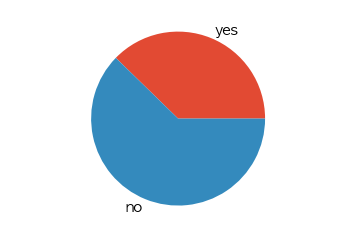

In [13]:
man_yes_num = len(man_df[man_df.iloc[:,2]=='はい'])
man_no_num = len(man_df[man_df.iloc[:,2]=='いいえ'])
man_yes_num/(man_no_num+man_yes_num)
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.axis('equal')
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
plt.pie([man_yes_num, man_no_num], labels=['yes','no'])
plt.show()

In [14]:
man_yes_num / (man_yes_num + man_no_num)

0.3770491803278688

保存してる人が37%

## どこから保存するか

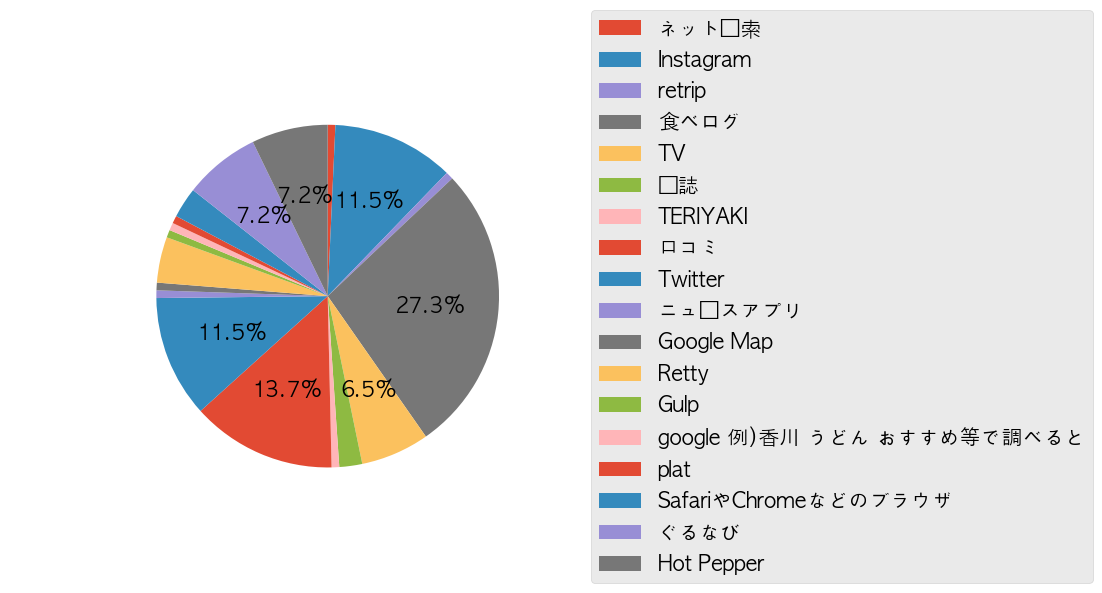

In [15]:
man_save = man_df[man_df.iloc[:,2]=='はい']
sources = [source.split(';') for source in man_save.iloc[:,7]]
from itertools import chain
sources = list(chain.from_iterable(sources))

sources_uniq = set(sources)

source_data = np.zeros(len(sources))
for (i, s) in enumerate(sources_uniq):
    for source in sources:
        if source == s:
            source_data[i] += 1

data = source_data
label = sources_uniq

import matplotlib.cm as cm

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

###各種パラメータ###
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

###pie###
plt.figure(figsize=size,dpi=100)
plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

食べログが27%
ニュースアプリが14%
instaが11.7%
twitterが11.7%
これで6割

ニュースアプリ何なのか気になる（聞いてみる？）

口コミは14％でインスタより多い

HotPepper,　ぐるなびのシェアは実装してもいいかも

## 保存した店に行く頻度

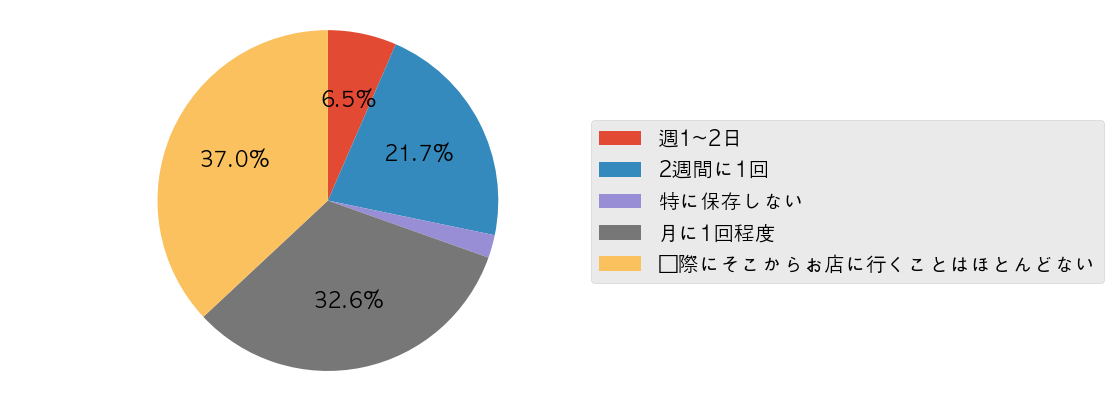

In [16]:
oftens = [source.split(';') for source in man_save.iloc[:,9]]
often = list(chain.from_iterable(oftens))

often_uniq = set(often)

often_data = np.zeros(len(often))
for (i, s) in enumerate(often_uniq):
    for p in often:
        if p == s:
            often_data[i] += 1

data = often_data
label = often_uniq

import matplotlib.cm as cm

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

###各種パラメータ###
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

###pie###
plt.figure(figsize=size,dpi=100)
plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

実際には行かない人が4割


## どこに保存するか

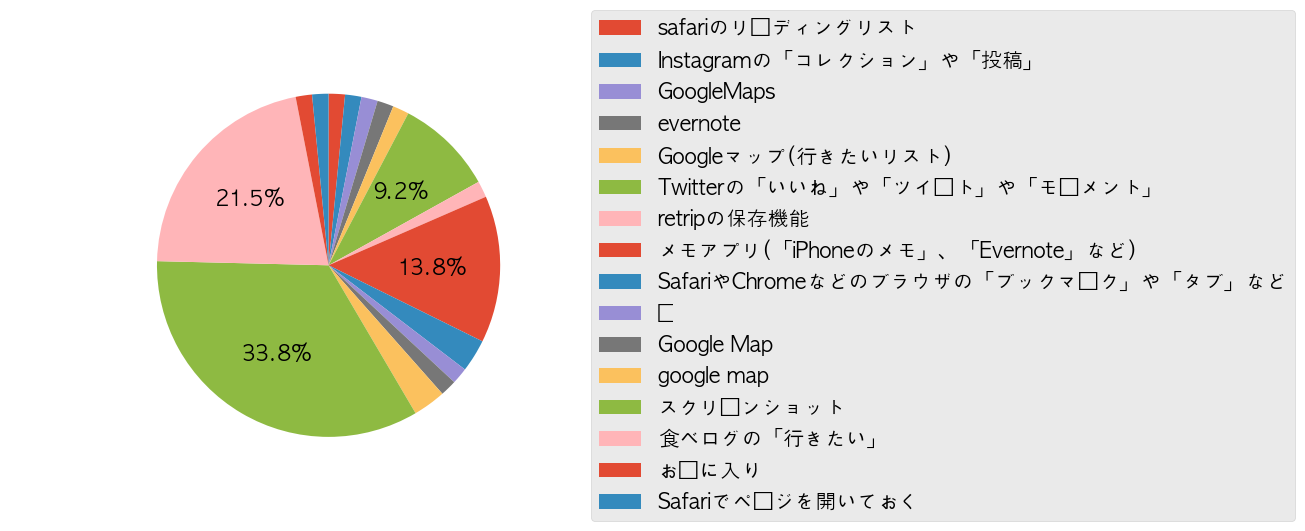

In [17]:
pool = [source.split(';') for source in man_save.copy().dropna(subset=['飲食店の情報はどこに保存していますか？(複数選択可能)']).iloc[:,8]]
pool = list(chain.from_iterable(pool))

pool_uniq = set(pool)

pool_data = np.zeros(len(pool))
for (i, s) in enumerate(pool_uniq):
    for p in pool:
        if p == s:
            pool_data[i] += 1

data = pool_data
label = pool_uniq

import matplotlib.cm as cm

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

###各種パラメータ###
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

###pie###
plt.figure(figsize=size,dpi=100)
plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

スクショが3割

食べログが2割

これで5割

男はメモアプリも多い

食べログ勢の熱量多少ある層が2割

instaのコレクションはほとんどいない

メモが13%でtwitterも1割いる

# 女

## 保存する割合

In [18]:
woman_df = df[df.iloc[:,1]=='女']
woman_yes_num = len(woman_df[woman_df.iloc[:,2]=='はい'])
woman_no_num = len(woman_df[woman_df.iloc[:,2]=='いいえ'])

In [19]:
woman_yes_num

40

In [20]:
woman_no_num

18

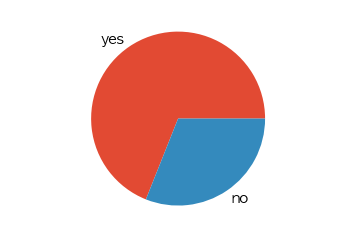

In [21]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.axis('equal')
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
plt.pie([woman_yes_num, woman_no_num], labels=['yes','no'])
plt.show()

In [22]:
32 / 56

0.5714285714285714

保存する人が38人、しない人が18人

する率が57%

## どこから保存するか

In [23]:
woman_save = woman_df[woman_df.iloc[:,2]=='はい']
sources = [source.split(';') for source in woman_save.iloc[:,7]]

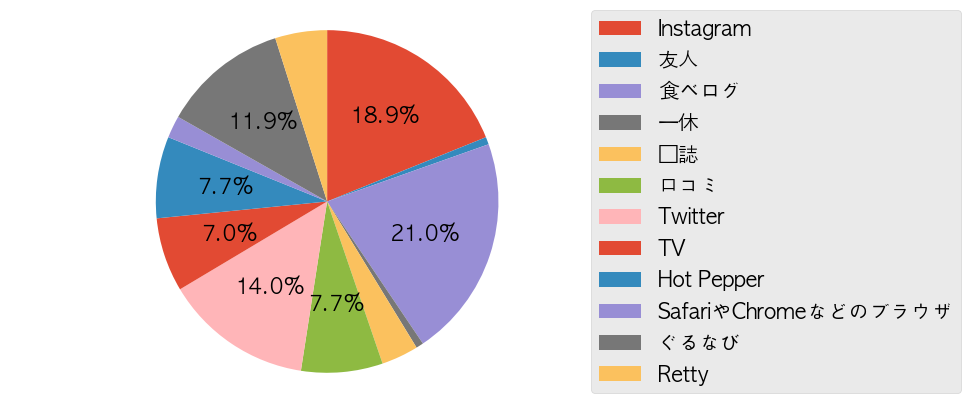

In [24]:
from itertools import chain
sources = list(chain.from_iterable(sources))

sources_uniq = set(sources)

source_data = np.zeros(len(sources))
for (i, s) in enumerate(sources_uniq):
    for source in sources:
        if source == s:
            source_data[i] += 1

data = source_data
label = sources_uniq

import matplotlib.cm as cm

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

###各種パラメータ###
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

###pie###
plt.figure(figsize=size,dpi=100)
plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

男と全然違う

食べログが21％

インスタが18％

twitterが14％

口コミはやっぱりあんまりないみたい(insta⊃口コミって感じなのかな)

ぐるなびとhotpepperは意外と1割強ずついる

## 保存した店にどれくらい行くか


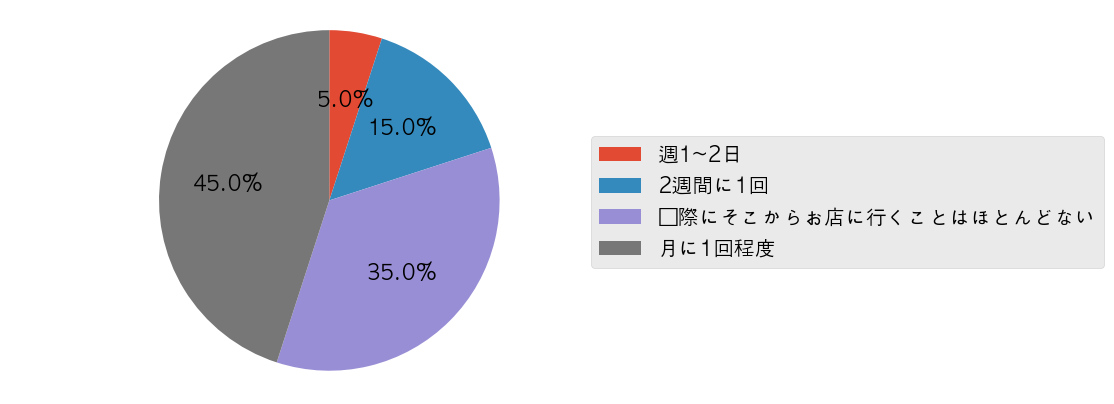

In [26]:
oftens = [source.split(';') for source in woman_save.iloc[:,9]]
often = list(chain.from_iterable(oftens))

often_uniq = set(often)

often_data = np.zeros(len(often))
for (i, s) in enumerate(often_uniq):
    for p in often:
        if p == s:
            often_data[i] += 1

data = often_data
label = often_uniq

import matplotlib.cm as cm

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

###各種パラメータ###
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

###pie###
plt.figure(figsize=size,dpi=100)
plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

月1行く人が多いけどここは男とあんまり変わらないと行ってもいいのかな

## どこに保存するか

In [27]:
pool = [source.split(';') for source in woman_save.iloc[:,8]]

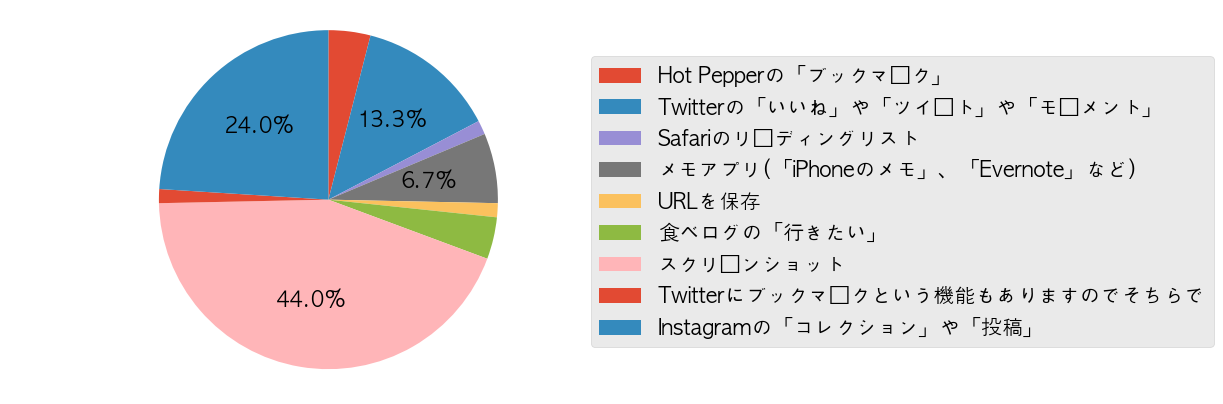

In [28]:
pool = list(chain.from_iterable(pool))

pool_uniq = set(pool)

pool_data = np.zeros(len(pool))
for (i, s) in enumerate(pool_uniq):
    for p in pool:
        if p == s:
            pool_data[i] += 1

data = pool_data
label = pool_uniq

import matplotlib.cm as cm

plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

###各種パラメータ###
size=(9,5) #凡例を配置する関係でsizeは横長にしておきます。
col=cm.Spectral(np.arange(len(data))/float(len(data))) #color指定はcolormapから好みのものを。

###pie###
plt.figure(figsize=size,dpi=100)
plt.pie(data, counterclock=False,startangle=90,autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '')
plt.subplots_adjust(left=0,right=0.7)
plt.legend(label,fancybox=True,loc='center left',bbox_to_anchor=(0.9,0.5))
plt.axis('equal') 
plt.savefig('figure.png',bbox_inches='tight',pad_inches=0.05)

スクショがめちゃおおい。

男にはほぼなかったインスタのコレクションも意外と多い

食べログ使ってる人はほぼほぼいない←！！！！！

やっぱりあんまりちゃんと管理してる人いない

が、これが管理したいと思ってないのか、やりたいけどできてないのかはわからん

# 保存してる女としてない女の違い

In [29]:
len(woman_df)

58

In [30]:
woman_df.head()

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
3,2018/10/18 10:54:56 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Twit...,実際にそこからお店に行くことはほとんどない,@kajiguchi97 いつでもどうぞ。頑張ってください！
5,2018/10/18 10:55:12 午後 GMT+9,女,はい,週1-2回,2週間に1回,塾講師・家庭教師;営業・マーケティング,いない,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
28,2018/10/18 11:05:04 午後 GMT+9,女,はい,週1-2回,2週間に1回,その他飲食店,いない,Instagram;Twitter;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
30,2018/10/18 11:05:15 午後 GMT+9,女,はい,2週間に1回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Instagram;Twitter,スクリーンショット;Twitterの「いいね」や「ツイート」や「モーメント」,月に1回程度,NaN
31,2018/10/18 11:05:17 午後 GMT+9,女,はい,週1-2回,月1回,カフェ;雑貨屋,NaN,Instagram;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,もりたまゆこ💞！


In [31]:
save_woman = woman_df[woman_df.iloc[:,2]=='はい']
non_save_woman = woman_df[woman_df.iloc[:,2]=='いいえ']

In [32]:
save_woman.head()

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
3,2018/10/18 10:54:56 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Twit...,実際にそこからお店に行くことはほとんどない,@kajiguchi97 いつでもどうぞ。頑張ってください！
5,2018/10/18 10:55:12 午後 GMT+9,女,はい,週1-2回,2週間に1回,塾講師・家庭教師;営業・マーケティング,いない,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
28,2018/10/18 11:05:04 午後 GMT+9,女,はい,週1-2回,2週間に1回,その他飲食店,いない,Instagram;Twitter;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
30,2018/10/18 11:05:15 午後 GMT+9,女,はい,2週間に1回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Instagram;Twitter,スクリーンショット;Twitterの「いいね」や「ツイート」や「モーメント」,月に1回程度,NaN
31,2018/10/18 11:05:17 午後 GMT+9,女,はい,週1-2回,月1回,カフェ;雑貨屋,NaN,Instagram;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,もりたまゆこ💞！


## 外食する頻度

In [33]:
save_often = save_woman.iloc[:,3]
save_often_uniq = set(save_often)
save_often_data = np.zeros(len(save_often_uniq))
for (i, u) in enumerate(save_often_uniq):
    for s in save_often:
        if s == u:
            save_often_data[i] += 1

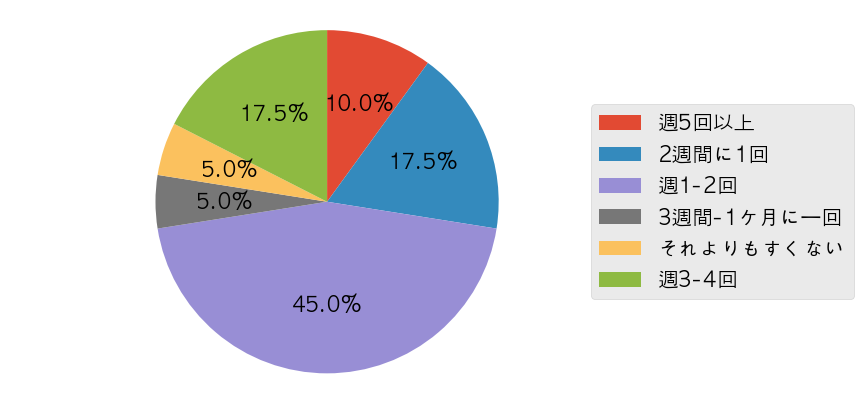

In [34]:
pie_chart(save_often_data, save_often_uniq)

In [35]:
non_save_often = non_save_woman.iloc[:,3]
non_save_often_data = np.zeros(len(save_often_uniq))
for (i, u) in enumerate(save_often_uniq):
    for s in non_save_often:
        if s == u:
            non_save_often_data[i] += 1

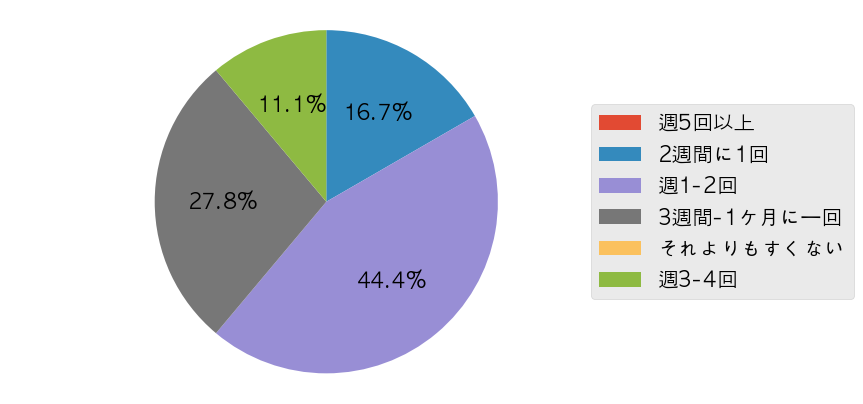

In [36]:
pie_chart(non_save_often_data, save_often_uniq)

そこまで差はない印象

週3以上外食する人は保存する傾向にある気がする

## 飲み会に行く頻度

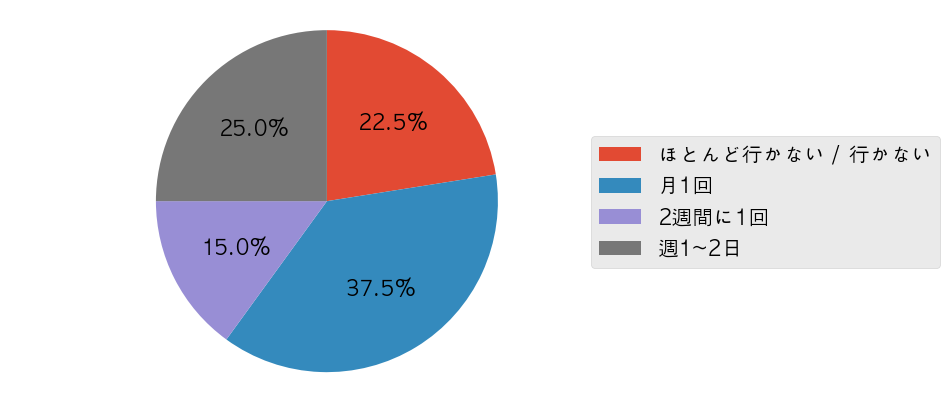

In [37]:
save_often_drink = save_woman.iloc[:,4]
save_often_drink_uniq = set(save_often_drink)
save_often_drink_data = np.zeros(len(save_often_drink_uniq))
for (i, u) in enumerate(save_often_drink_uniq):
    for s in save_often_drink:
        if s == u:
            save_often_drink_data[i] += 1
pie_chart(save_often_drink_data, save_often_drink_uniq)

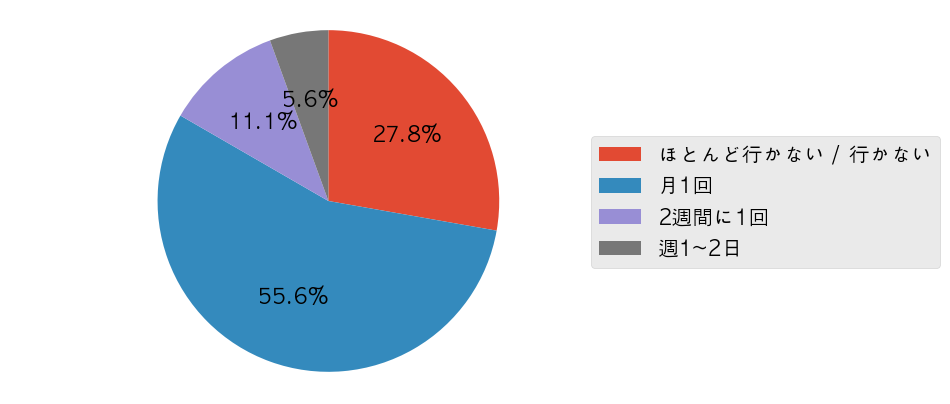

In [38]:
non_save_often_drink = non_save_woman.iloc[:,4]
non_save_often_drink_data = np.zeros(len(save_often_drink_uniq))
for (i, u) in enumerate(save_often_drink_uniq):
    for s in non_save_often_drink:
        if s == u:
            non_save_often_drink_data[i] += 1
pie_chart(non_save_often_drink_data, save_often_drink_uniq)

これは割と差がある。

保存する人は飲む傾向にある。

やっぱ保存してる人はチャラそう

## 彼氏いるか

In [39]:
with_boyfriend_num = len(woman_df[woman_df.iloc[:,6]=='いる'])
without_boyfriend_num = len(woman_df[woman_df.iloc[:,6]=='いない'])
boyfriend_rate = with_boyfriend_num/(with_boyfriend_num+without_boyfriend_num) * 100
print("全体で彼氏いる率: {}%".format(boyfriend_rate))

save_with_boyfriend_num = len(save_woman[save_woman.iloc[:,6]=='いる'])
save_without_boyfriend_num = len(save_woman[save_woman.iloc[:,6]=='いない'])
save_boyfriend_rate = save_with_boyfriend_num/(save_with_boyfriend_num+save_without_boyfriend_num) * 100
print("保存してる人の中で彼氏いる率: {}%".format(save_boyfriend_rate))

non_save_with_boyfriend_num = len(non_save_woman[non_save_woman.iloc[:,6]=='いる'])
non_save_without_boyfriend_num = len(non_save_woman[non_save_woman.iloc[:,6]=='いない'])
non_save_boyfriend_rate = non_save_with_boyfriend_num/(non_save_with_boyfriend_num + non_save_without_boyfriend_num) * 100
print("保存してない人の中で彼氏いる率: {}%".format(non_save_boyfriend_rate))

全体で彼氏いる率: 33.92857142857143%
保存してる人の中で彼氏いる率: 38.46153846153847%
保存してない人の中で彼氏いる率: 23.52941176470588%


やっぱり彼氏、彼女いる率と正相関ありそう。

どっちが先かはわかんないけど

## どんなバイトやってるか

In [40]:
woman_save_copy = woman_save.copy()

In [41]:
woman_save_copy = woman_save_copy.fillna('やっていない')

In [42]:
import collections
def flatten(l):
    for el in l:
        if isinstance(el, collections.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

In [43]:
woman_df_copy = woman_df.fillna('やっていない')

In [44]:
job = [source.split(';') for source in woman_df_copy.iloc[:,5]]
job = list(flatten(job))

job_uniq = set(job)

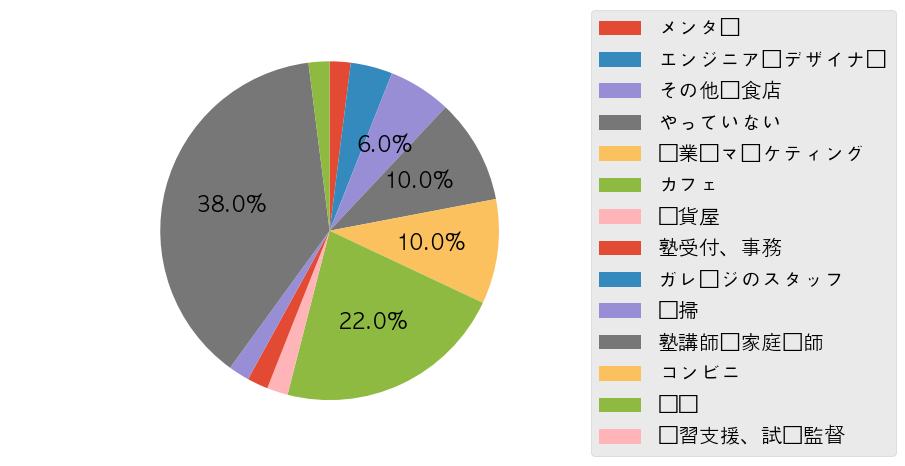

In [45]:
save_job = list(flatten([source.split(';') for source in woman_save_copy.iloc[:,5]]))
job_uniq = set(job)
save_job_data = np.zeros(len(job_uniq))
for (i, s) in enumerate(job_uniq):
    for p in save_job:
        if p == s:
            save_job_data[i] += 1

pie_chart(save_job_data, job_uniq)

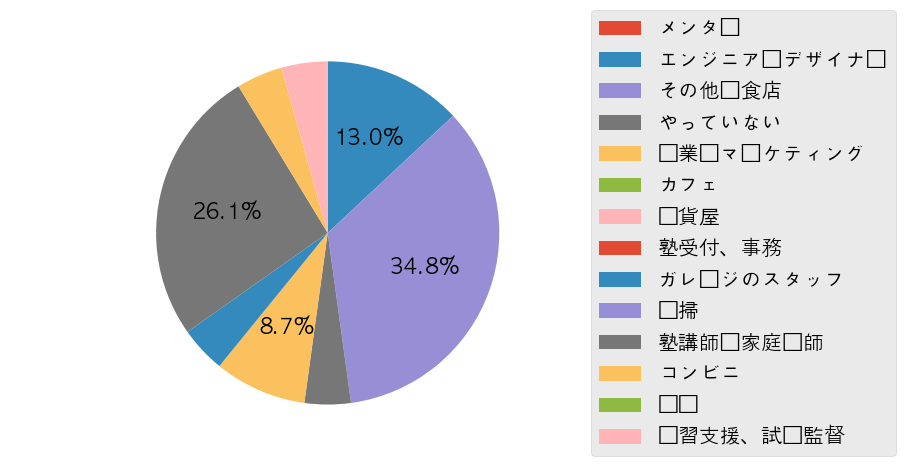

In [46]:
non_save_job = list(flatten([source.split(';') for source in non_save_woman.iloc[:,5]]))
non_save_data = np.zeros(len(job_uniq))
for (i, s) in enumerate(job_uniq):
    for p in non_save_job:
        if p == s:
            non_save_data[i] += 1
pie_chart(non_save_data, job_uniq)

カフェバイト率の圧倒的な違い

飲食バイトは保存してない方が率高い

概して何となく確かに保存してる人はリア充な感じする

# 保存してる女の分析

## 保存した店によく行く人

In [47]:
woman_save

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
3,2018/10/18 10:54:56 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Twit...,実際にそこからお店に行くことはほとんどない,@kajiguchi97 いつでもどうぞ。頑張ってください！
5,2018/10/18 10:55:12 午後 GMT+9,女,はい,週1-2回,2週間に1回,塾講師・家庭教師;営業・マーケティング,いない,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
28,2018/10/18 11:05:04 午後 GMT+9,女,はい,週1-2回,2週間に1回,その他飲食店,いない,Instagram;Twitter;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
30,2018/10/18 11:05:15 午後 GMT+9,女,はい,2週間に1回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Instagram;Twitter,スクリーンショット;Twitterの「いいね」や「ツイート」や「モーメント」,月に1回程度,NaN
31,2018/10/18 11:05:17 午後 GMT+9,女,はい,週1-2回,月1回,カフェ;雑貨屋,NaN,Instagram;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,もりたまゆこ💞！
33,2018/10/18 11:06:06 午後 GMT+9,女,はい,週1-2回,週1~2日,カフェ;エンジニア・デザイナー,いない,食べログ;Instagram;Twitter;口コミ;ぐるなび;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
34,2018/10/18 11:06:16 午後 GMT+9,女,はい,3週間-1ヶ月に一回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Retty;ぐるなび,スクリーンショット,月に1回程度,NaN
37,2018/10/18 11:06:33 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,やっていない,いない,食べログ;Retty;Instagram;口コミ;Hot Pepper;ぐるなび,スクリーンショット,実際にそこからお店に行くことはほとんどない,NaN
38,2018/10/18 11:06:52 午後 GMT+9,女,はい,週3-4回,週1~2日,塾講師・家庭教師;営業・マーケティング,いない,食べログ;Instagram;Twitter,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
41,2018/10/18 11:08:03 午後 GMT+9,女,はい,週1-2回,週1~2日,塾講師・家庭教師;カフェ,いる,Instagram;Twitter;ぐるなび,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Inst...,実際にそこからお店に行くことはほとんどない,NaN


In [48]:
pd.concat([woman_save[woman_save.iloc[:,9] == '2週間に1回'], woman_save[woman_save.iloc[:,9] == '週1~2日']], axis=0)

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
5,2018/10/18 10:55:12 午後 GMT+9,女,はい,週1-2回,2週間に1回,塾講師・家庭教師;営業・マーケティング,いない,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
31,2018/10/18 11:05:17 午後 GMT+9,女,はい,週1-2回,月1回,カフェ;雑貨屋,NaN,Instagram;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,もりたまゆこ💞！
46,2018/10/18 11:09:32 午後 GMT+9,女,はい,週1-2回,月1回,塾講師・家庭教師,いる,食べログ;Instagram;Hot Pepper,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
52,2018/10/18 11:11:20 午後 GMT+9,女,はい,週5回以上,月1回,塾講師・家庭教師,いる,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,2週間に1回,NaN
113,2018/10/19 12:39:51 午前 GMT+9,女,はい,週1-2回,月1回,塾講師・家庭教師,いる,Instagram;Twitter;TV;友人,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
162,2018/10/19 2:37:48 午後 GMT+9,女,はい,週3-4回,週1~2日,カフェ,いる,食べログ;Instagram;Twitter;Hot Pepper;ぐるなび;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
138,2018/10/19 9:04:03 午前 GMT+9,女,はい,週1-2回,2週間に1回,カフェ;メンター,いる,食べログ;Instagram;口コミ;SafariやChromeなどのブラウザ;Hot Pe...,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Inst...,週1~2日,@yunapus
179,2018/10/20 10:49:26 午後 GMT+9,女,はい,週1-2回,週1~2日,翻訳,いる,食べログ;Twitter;ぐるなび,食べログの「行きたい」,週1~2日,@maim__01257


これは熱い

めっちゃ似てる！！！！！！！！！！！

だいたい彼氏いる（森田もいる）

プールはスクショとインスタが圧倒的に多い。

ソースはインスタが主なのかな、多分

## ソースが複数の人と一つの人

In [61]:
woman_save[np.array([len(source.split(';')) for source in woman_save.iloc[:,7]]) > 1]

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
3,2018/10/18 10:54:56 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Twit...,実際にそこからお店に行くことはほとんどない,@kajiguchi97 いつでもどうぞ。頑張ってください！
5,2018/10/18 10:55:12 午後 GMT+9,女,はい,週1-2回,2週間に1回,塾講師・家庭教師;営業・マーケティング,いない,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
28,2018/10/18 11:05:04 午後 GMT+9,女,はい,週1-2回,2週間に1回,その他飲食店,いない,Instagram;Twitter;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
30,2018/10/18 11:05:15 午後 GMT+9,女,はい,2週間に1回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Instagram;Twitter,スクリーンショット;Twitterの「いいね」や「ツイート」や「モーメント」,月に1回程度,NaN
31,2018/10/18 11:05:17 午後 GMT+9,女,はい,週1-2回,月1回,カフェ;雑貨屋,NaN,Instagram;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,もりたまゆこ💞！
33,2018/10/18 11:06:06 午後 GMT+9,女,はい,週1-2回,週1~2日,カフェ;エンジニア・デザイナー,いない,食べログ;Instagram;Twitter;口コミ;ぐるなび;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
34,2018/10/18 11:06:16 午後 GMT+9,女,はい,3週間-1ヶ月に一回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Retty;ぐるなび,スクリーンショット,月に1回程度,NaN
37,2018/10/18 11:06:33 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,やっていない,いない,食べログ;Retty;Instagram;口コミ;Hot Pepper;ぐるなび,スクリーンショット,実際にそこからお店に行くことはほとんどない,NaN
38,2018/10/18 11:06:52 午後 GMT+9,女,はい,週3-4回,週1~2日,塾講師・家庭教師;営業・マーケティング,いない,食べログ;Instagram;Twitter,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
41,2018/10/18 11:08:03 午後 GMT+9,女,はい,週1-2回,週1~2日,塾講師・家庭教師;カフェ,いる,Instagram;Twitter;ぐるなび,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Inst...,実際にそこからお店に行くことはほとんどない,NaN


In [62]:
woman_save[np.array([len(source.split(';')) for source in woman_save.iloc[:,7]]) < 2]

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
48,2018/10/18 11:10:26 午後 GMT+9,女,はい,週3-4回,月1回,塾講師・家庭教師,いる,食べログ,Safariのリーディングリスト,実際にそこからお店に行くことはほとんどない,NaN
173,2018/10/20 1:07:39 午前 GMT+9,女,はい,週5回以上,週1~2日,NaN,いない,食べログ,スクリーンショット,実際にそこからお店に行くことはほとんどない,NaN


## 保存先が複数の人と一つの人

In [63]:
woman_save[np.array([len(pool.split(';')) for pool in woman_save.iloc[:,8]]) > 1]

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
3,2018/10/18 10:54:56 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Twit...,実際にそこからお店に行くことはほとんどない,@kajiguchi97 いつでもどうぞ。頑張ってください！
5,2018/10/18 10:55:12 午後 GMT+9,女,はい,週1-2回,2週間に1回,塾講師・家庭教師;営業・マーケティング,いない,Instagram;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN
28,2018/10/18 11:05:04 午後 GMT+9,女,はい,週1-2回,2週間に1回,その他飲食店,いない,Instagram;Twitter;口コミ,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
30,2018/10/18 11:05:15 午後 GMT+9,女,はい,2週間に1回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Instagram;Twitter,スクリーンショット;Twitterの「いいね」や「ツイート」や「モーメント」,月に1回程度,NaN
31,2018/10/18 11:05:17 午後 GMT+9,女,はい,週1-2回,月1回,カフェ;雑貨屋,NaN,Instagram;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,もりたまゆこ💞！
33,2018/10/18 11:06:06 午後 GMT+9,女,はい,週1-2回,週1~2日,カフェ;エンジニア・デザイナー,いない,食べログ;Instagram;Twitter;口コミ;ぐるなび;雑誌;TV,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
38,2018/10/18 11:06:52 午後 GMT+9,女,はい,週3-4回,週1~2日,塾講師・家庭教師;営業・マーケティング,いない,食べログ;Instagram;Twitter,スクリーンショット;Instagramの「コレクション」や「投稿」;Twitterの「いいね...,月に1回程度,NaN
41,2018/10/18 11:08:03 午後 GMT+9,女,はい,週1-2回,週1~2日,塾講師・家庭教師;カフェ,いる,Instagram;Twitter;ぐるなび,スクリーンショット;メモアプリ(「iPhoneのメモ」、「Evernote」など);Inst...,実際にそこからお店に行くことはほとんどない,NaN
42,2018/10/18 11:08:48 午後 GMT+9,女,はい,週1-2回,ほとんど行かない / 行かない,塾講師・家庭教師,いる,食べログ;Twitter;Hot Pepper;ぐるなび,スクリーンショット;Twitterの「いいね」や「ツイート」や「モーメント」;Hot Pep...,月に1回程度,NaN
46,2018/10/18 11:09:32 午後 GMT+9,女,はい,週1-2回,月1回,塾講師・家庭教師,いる,食べログ;Instagram;Hot Pepper,スクリーンショット;Instagramの「コレクション」や「投稿」,2週間に1回,NaN


In [64]:
woman_save[np.array([len(pool.split(';')) for pool in woman_save.iloc[:,8]]) < 2]

,タイムスタンプ,性別を教えてください。,お気に入りの飲食店や行きたい飲食店の情報を何らかの方法でスマートフォン内に保存していますか？,夜に外食する頻度を教えてください。,飲み会に行く頻度を教えてください。,バイトやインターンを教えてください(複数回答可能),現在交際中の人はいますか？(任意回答),飲食店の情報はどこから仕入れることが多いですか？(複数選択可能),飲食店の情報はどこに保存していますか？(複数選択可能),保存している飲食店に行くことはどれくらいありますか？,気になった方に後日連絡するためにTwitterIDやLINEIDなどを教えてください。(任意)
34,2018/10/18 11:06:16 午後 GMT+9,女,はい,3週間-1ヶ月に一回,ほとんど行かない / 行かない,塾講師・家庭教師,いない,食べログ;Retty;ぐるなび,スクリーンショット,月に1回程度,NaN
37,2018/10/18 11:06:33 午後 GMT+9,女,はい,それよりもすくない,ほとんど行かない / 行かない,やっていない,いない,食べログ;Retty;Instagram;口コミ;Hot Pepper;ぐるなび,スクリーンショット,実際にそこからお店に行くことはほとんどない,NaN
48,2018/10/18 11:10:26 午後 GMT+9,女,はい,週3-4回,月1回,塾講師・家庭教師,いる,食べログ,Safariのリーディングリスト,実際にそこからお店に行くことはほとんどない,NaN
56,2018/10/18 11:13:26 午後 GMT+9,女,はい,週1-2回,月1回,塾講師・家庭教師,いない,食べログ;Hot Pepper;ぐるなび;TV,スクリーンショット,実際にそこからお店に行くことはほとんどない,NaN
61,2018/10/18 11:15:28 午後 GMT+9,女,はい,週1-2回,週1~2日,やっていない,いない,食べログ;Retty;Instagram;Hot Pepper;ぐるなび,スクリーンショット,月に1回程度,NaN
68,2018/10/18 11:19:39 午後 GMT+9,女,はい,週1-2回,月1回,その他飲食店;営業・マーケティング,いない,食べログ;Instagram,Instagramの「コレクション」や「投稿」,実際にそこからお店に行くことはほとんどない,NaN
78,2018/10/18 11:28:06 午後 GMT+9,女,はい,週5回以上,2週間に1回,塾講師・家庭教師,いない,食べログ;Instagram;Twitter,Instagramの「コレクション」や「投稿」,実際にそこからお店に行くことはほとんどない,NaN
130,2018/10/19 7:58:41 午前 GMT+9,女,はい,2週間に1回,月1回,塾講師・家庭教師,いる,食べログ;口コミ;ぐるなび;TV,スクリーンショット,実際にそこからお店に行くことはほとんどない,NaN
142,2018/10/19 9:14:11 午前 GMT+9,女,はい,3週間-1ヶ月に一回,ほとんど行かない / 行かない,塾受付、事務,いない,Twitter;一休,スクリーンショット,月に1回程度,NaN
163,2018/10/19 2:41:23 午後 GMT+9,女,はい,週5回以上,週1~2日,カフェ,いない,食べログ;Instagram;SafariやChromeなどのブラウザ;Hot Pepper...,スクリーンショット,月に1回程度,らいん:0432risa
